# ENTRENANDO MODELO DE ML PARA PREDECIR PRECIO DE CASAS EUROPEAS
## DATASET: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing

#PASO 1 - INSTALAMOS E IMPORTAMOS LIBRERIAS

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
sns.set(style="whitegrid",context='notebook')

#PASO 2 CARGAMOS EL DATASET

In [99]:
df = pd.read_csv('/content/bank_clean.csv')
df

,job,age,campaign,euribor3m,y
0,housemaid,56,1,4.857,0
1,services,57,1,4.857,0
2,services,37,1,4.857,0
3,admin.,40,1,4.857,0
4,services,56,1,4.857,0
...,...,...,...,...,...
41183,retired,73,1,1.028,1
41184,blue-collar,46,1,1.028,0
41185,retired,56,2,1.028,0
41186,technician,44,1,1.028,1


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   job        41188 non-null  object 
 1   age        41188 non-null  int64  
 2   campaign   41188 non-null  int64  
 3   euribor3m  41188 non-null  float64
 4   y          41188 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.6+ MB


#PASO 4: CODIFICACION DE VARIABLE CATEGORICAS CON SKLEAN

## 4.1 IDENTIFICAMOS VARIABLES CATEGORICAS

In [101]:
categorical_columns = df.select_dtypes(object).columns
categorical_columns

Index(['job'], dtype='object')

## 4.2 CREAMOS LISTA POR TIPO DE CODIFICACIÓN

In [102]:
for cc in categorical_columns:
  print("*"*50)
  print(df[cc].value_counts())

**************************************************
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


## 4.2 CREAMOS LISTA POR TIPO DE CODIFICACIÓN

In [107]:
onehot_cols = ['job']

In [108]:
features = ['job', 'age', 'campaign', 'euribor3m', 'y']
X = df[features]


## 4.4 CODIFICAMOS USANDO LOS MODULSO COMPOSE Y PREPROCESSING DE SKLEARN

In [109]:
import sklearn.compose
import sklearn.preprocessing

In [110]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# columnas
onehot_cols = ['job']
numeric_cols = ['age', 'campaign', 'euribor3m','y']

# transformer
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_cols),
    remainder='passthrough'
)

# transformar
X_transformed = transformer.fit_transform(X)

# dataframe final
data_transformed_df = pd.DataFrame(
    X_transformed,
    columns=transformer.get_feature_names_out(),
    index=X.index
)

data_transformed_df.head()


,onehotencoder__job_admin.,onehotencoder__job_blue-collar,onehotencoder__job_entrepreneur,onehotencoder__job_housemaid,onehotencoder__job_management,onehotencoder__job_retired,onehotencoder__job_self-employed,onehotencoder__job_services,onehotencoder__job_student,onehotencoder__job_technician,onehotencoder__job_unemployed,onehotencoder__job_unknown,remainder__age,remainder__campaign,remainder__euribor3m,remainder__y
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,1.0,4.857,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,57.0,1.0,4.857,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,37.0,1.0,4.857,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,1.0,4.857,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,56.0,1.0,4.857,0.0


In [112]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# columnas
onehot_cols = ['job']
numeric_cols = ['age', 'campaign', 'euribor3m','y']

### 4.4.1 CREAMOS UN TRANSFORMER

In [113]:
# transformer
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_cols),
    remainder='passthrough'
)

### 4.4.2 APLICAMOS EL TRANSFOMER A EL DATASET

In [114]:
# transformar
X_transformed = transformer.fit_transform(X)

# dataframe final
data_transformed_df = pd.DataFrame(
    X_transformed,
    columns=transformer.get_feature_names_out(),
    index=X.index
)

data_transformed_df

,onehotencoder__job_admin.,onehotencoder__job_blue-collar,onehotencoder__job_entrepreneur,onehotencoder__job_housemaid,onehotencoder__job_management,onehotencoder__job_retired,onehotencoder__job_self-employed,onehotencoder__job_services,onehotencoder__job_student,onehotencoder__job_technician,onehotencoder__job_unemployed,onehotencoder__job_unknown,remainder__age,remainder__campaign,remainder__euribor3m,remainder__y
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,1.0,4.857,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,57.0,1.0,4.857,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,37.0,1.0,4.857,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,1.0,4.857,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,56.0,1.0,4.857,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,1.0,1.028,1.0
41184,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,1.0,1.028,0.0
41185,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,2.0,1.028,0.0
41186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,44.0,1.0,1.028,1.0


In [115]:
data_transformed_df = data_transformed_df.rename(
    columns=lambda x: x.replace("ordinalencoder__", "").replace("onehotencoder__", "").replace("remainder__", "")
)

data_transformed_df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,age,campaign,euribor3m,y
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,1.0,4.857,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,57.0,1.0,4.857,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,37.0,1.0,4.857,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,1.0,4.857,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,56.0,1.0,4.857,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,1.0,1.028,1.0
41184,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,1.0,1.028,0.0
41185,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,2.0,1.028,0.0
41186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,44.0,1.0,1.028,1.0


In [116]:
data_transformed_df.dtypes

,0
job_admin.,float64
job_blue-collar,float64
job_entrepreneur,float64
job_housemaid,float64
job_management,float64
job_retired,float64
job_self-employed,float64
job_services,float64
job_student,float64
job_technician,float64


In [117]:
data_transformed_df.to_csv('bank_transformed.csv',index=None)

In [118]:
data_transformed_df = pd.read_csv('/content/bank_transformed.csv')
data_transformed_df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,age,campaign,euribor3m,y
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,1.0,4.857,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,57.0,1.0,4.857,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,37.0,1.0,4.857,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,1.0,4.857,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,56.0,1.0,4.857,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,1.0,1.028,1.0
41184,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,1.0,1.028,0.0
41185,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,2.0,1.028,0.0
41186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,44.0,1.0,1.028,1.0


# PASO 5 - CORRELACIONES

In [119]:
corr_matrix = data_transformed_df.corr()
corr_charges = corr_matrix['age']
corr_charges.sort_values(ascending=False)

,age
age,1.000000
job_retired,0.440772
job_housemaid,0.085403
job_management,0.062040
job_unknown,0.047773
job_entrepreneur,0.031213
y,0.030399
euribor3m,0.010767
campaign,0.004594
job_self-employed,-0.001356


<Axes: >

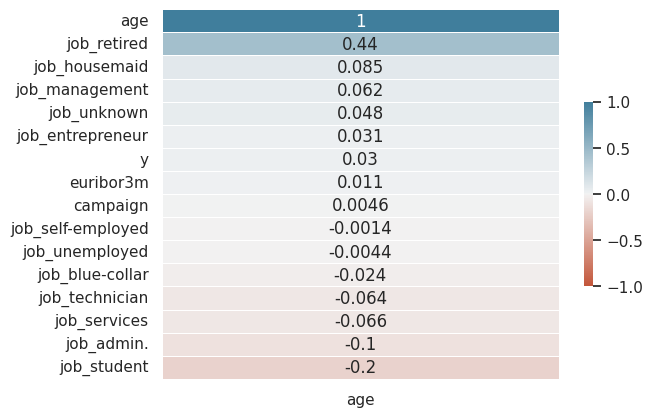

In [120]:
sns.heatmap(
    data=corr_charges.sort_values(ascending=False).to_frame(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

## PASO 6 - IDENTIFICAMOS VARIABLE X y Y , dividmos en train test

In [121]:
cols = corr_charges.index.tolist()
cols.remove('age')
cols

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'campaign',
 'euribor3m',
 'y']

In [122]:
X = data_transformed_df[cols].values
y = data_transformed_df['age'].values.reshape(-1,1)

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

# CREAMOS UN CODIGO PARA PODER EVALUAR VARIOS MODELOS

In [124]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler

## 2 - ESCALAMIENTO DE DATOS

In [128]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

## 3 - CREAMOS DICCIONARIO DE MODELOS

In [129]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1.0),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=10),
    "SVR": SVR(kernel='rbf'),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

## 4 - CREAMOS BUCLE PARA PROBAR CADA MODELO DEL DICCIONARIO

In [130]:
results = {}
for name,model in models.items():
  model.fit(X_train_scaled,y_train_scaled.ravel())
  y_pred_scaled = model.predict(X_test_scaled)

  r2 = r2_score(y_test_scaled, y_pred_scaled)
  mse = mean_squared_error(y_test_scaled, y_pred_scaled)
  mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
  results[name] = {"R2": r2, "MSE": mse, "MAE": mae}

# MOSTRAMOS RESULTADOS DE LOS MODELOS ENTRENADOS

In [131]:
results_df = pd.DataFrame(results).T
print("Model Comparison:")
display(results_df)

Model Comparison:


,R2,MSE,MAE
Linear Regression,0.256744,0.729600,0.705132
Lasso,0.213980,0.771577,0.727056
Ridge,0.256744,0.729599,0.705131
KNN Regressor,0.249682,0.736532,0.694434
SVR,0.255956,0.730373,0.681726
Random Forest Regressor,0.247807,0.738372,0.689447


# BUSCAMOS EL MEJOR MODELO

In [132]:
best_r2_model = results_df['R2'].idxmax()
best_mse_model = results_df['MSE'].idxmin()
print(f"\nBest model based on R2: {best_r2_model} (R2: {results_df.loc[best_r2_model, 'R2']:.4f})")
print(f"Best model based on MSE: {best_mse_model} (MSE: {results_df.loc[best_mse_model, 'MSE']:.2f})")


Best model based on R2: Ridge (R2: 0.2567)
Best model based on MSE: Ridge (MSE: 0.73)


# GRAFICAMOS RESULTADOS

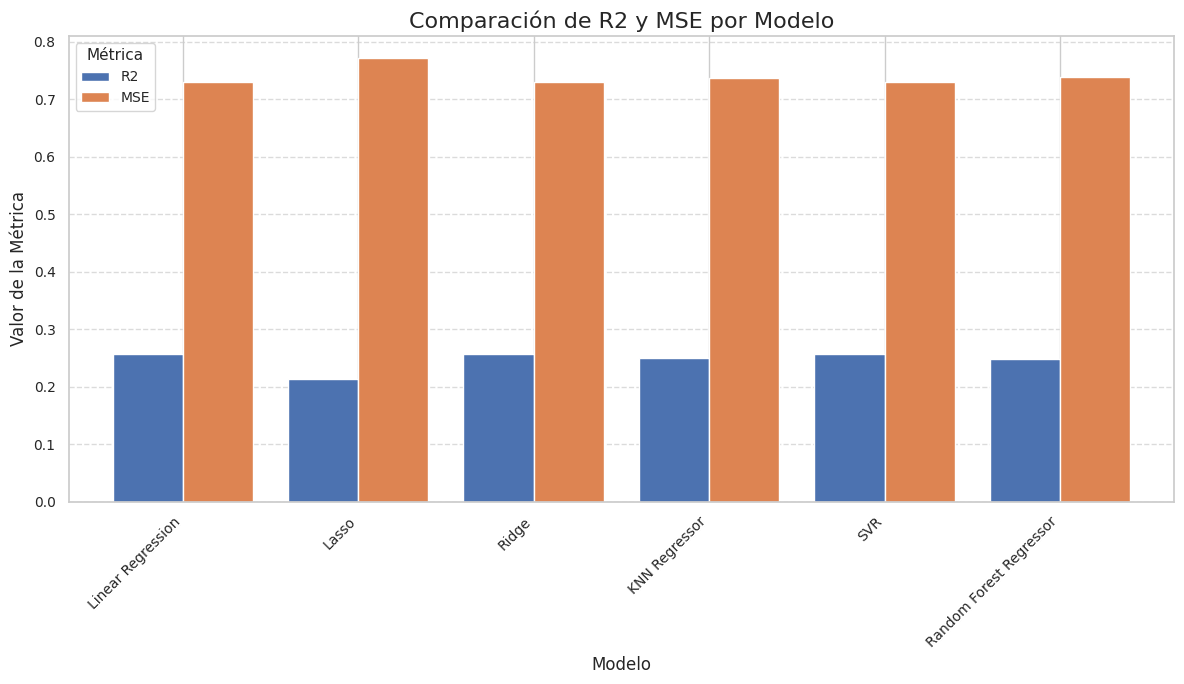

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las métricas R2 y MSE para comparar
results_to_plot = results_df[['R2', 'MSE']]

# Crear el gráfico de barras comparativo
fig, ax = plt.subplots(figsize=(12, 7))
results_to_plot.plot(kind='bar', ax=ax, width=0.8)

plt.title('Comparación de R2 y MSE por Modelo', fontsize=16)
plt.ylabel('Valor de la Métrica', fontsize=12)
plt.xlabel('Modelo', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Métrica', fontsize=10, title_fontsize='11')
plt.tight_layout()
plt.show()

In [83]:

import joblib

In [134]:
df_full = pd.read_csv('/content/bank_clean.csv', sep=';')
df_full

,"job,age,campaign,euribor3m,y"
0,"housemaid,56,1,4.857,0"
1,"services,57,1,4.857,0"
2,"services,37,1,4.857,0"
3,"admin.,40,1,4.857,0"
4,"services,56,1,4.857,0"
...,...
41183,"retired,73,1,1.028,1"
41184,"blue-collar,46,1,1.028,0"
41185,"retired,56,2,1.028,0"
41186,"technician,44,1,1.028,1"


In [136]:
X.shape
y.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [87]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

cat_features = ['job']
num_features = ['age', 'campaign', 'euribor3m']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
        ('num', StandardScaler(), num_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [88]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'campaign',
                                                   'euribor3m'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [89]:
joblib.dump(model, 'model.pkl')
model = joblib.load('model.pkl')

In [90]:
def predict_loan_acceptance(job, age, campaign, euribor3m):
    new_data = pd.DataFrame([{
        'job': job,
        'age': age,
        'campaign': campaign,
        'euribor3m': euribor3m
    }])

    pred = model.predict(new_data)
    prob = model.predict_proba(new_data)

    return pred[0], prob[0][1]

In [91]:
def predict_loan_acceptance(job, age, campaign, euribor3m):
    new_data = pd.DataFrame([{
        'job': job,
        'age': age,
        'campaign': campaign,
        'euribor3m': euribor3m
    }])

    pred = model.predict(new_data)
    prob = model.predict_proba(new_data)

    return pred[0], prob[0][1]

In [92]:
pred, prob = predict_loan_acceptance(
    job='technician',
    age=35,
    campaign=2,
    euribor3m=1.2
)

print("¿Acepta el préstamo?:", "Sí" if pred == 1 else "No")
print(f"Probabilidad de aceptación: {prob:.2%}")

¿Acepta el préstamo?: No
Probabilidad de aceptación: 24.95%
